## Function visualization

### Theory
#### The Leff function is expressed by the following formula.

$$
\mathrm{Leff}(x) = \frac{Lself*Rsol*(Rsol+Rs-(2\pi x)^2*Lself*Cself*Rsol)-Rsol*Rs*(Lself+Cselfk*Rsol*Rs)}{(Rsol+Rs-(2\pi x)^2*Lself*Cself*Rsol)^2+(2\pi x)^2*(Lself+Cself*Rsol*Rs)^2}
$$

 **Includes 2πx = ω ( x = f ), Lself, Rsol, Rs, Cself as function constants.**<br>
**Please refer to the result below for the outline of the function.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
def Leff(x):
    return (Lself*Rsol*(Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)-Rsol*Rs*(Lself+Cself*Rsol*Rs))/((Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)**2+(2*np.pi*x)**2*(Lself+Cself*Rsol*Rs)**2)

In [3]:
Lself=2.08E-5
Rs=1.2
Rsol=1050
Cself=9.72E-11

In [4]:
df_measured_value = pd.read_csv('../../Research_identification_ecg/moto_measured_value.csv',sep=',')
df_measured_value.head()

,周波数f[Hz],実測値L[H]
0,100000,0.000023
1,200000,0.000023
2,300000,0.000023
3,400000,0.000024
4,500000,0.000024


In [5]:
list_measured_value = df_measured_value.T.values.tolist()

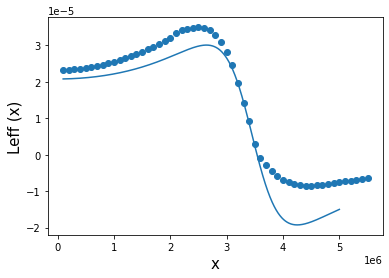

In [6]:
x_min = 100000
x_max = 5000000
N = 10000
x = np.linspace(x_min, x_max, N)
y = Leff(x)
plt.scatter(list_measured_value[0],list_measured_value[1])
plt.plot(x,y)
plt.xlabel('x',fontsize = 15)
plt.ylabel('Leff (x)',fontsize =15)
plt.show()

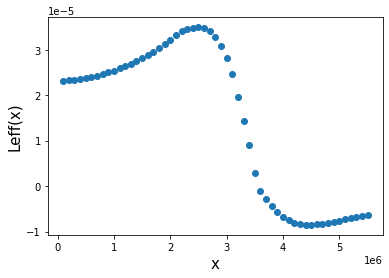

In [21]:
plt.scatter(list_measured_value[0],list_measured_value[1])
plt.xlabel('x',fontsize=15)
plt.ylabel('Leff(x)',fontsize=15)
plt.show()

fitting

In [15]:
#measured data
xdata  = np.array(list_measured_value[0])
ydata = np.array(list_measured_value[1])

In [16]:
type(xdata)

numpy.ndarray

In [12]:
Lself

2.08e-05

In [34]:
#Least squares method with scipy.optimize
def fit_func(parameter,x,y):
    Lself=2.08E-5
    Rs=1.2
    Rsol = parameter[0]
    Cself = parameter[1]
    residual = y - ((Lself*Rsol*(Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)-Rsol*Rs*(Lself+Cself*Rsol*Rs))/((Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)**2+(2*np.pi*x)**2*(Lself+Cself*Rsol*Rs)**2))
    return residual

In [35]:
parameter0 = [0.,0.]
result = optimize.leastsq(fit_func,parameter0,args=(xdata,ydata))
print(result)
a_fit=result[0][0]
b_fit=result[0][1]

print(a_fit,b_fit)

(array([0., 0.]), 4)
0.0 0.0


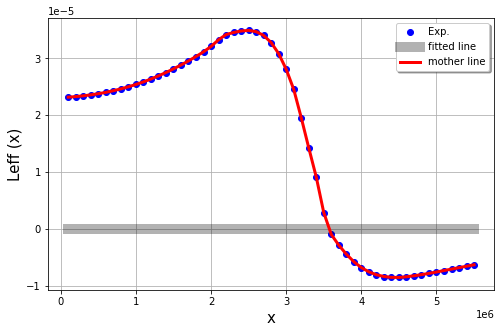

In [36]:
#PLot
plt.figure(figsize=(8,5))
plt.plot(xdata,ydata,'bo', label='Exp.')
plt.plot(xdata,a_fit*xdata+b_fit,'k-', label='fitted line', linewidth=10, alpha=0.3)
plt.plot(xdata,ydata,'r-', label='mother line', linewidth=3)
plt.xlabel('x',fontsize = 15)
plt.ylabel('Leff (x)',fontsize=15)
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [40]:
from scipy.optimize import curve_fit

In [37]:
#Least squares method with scipy.optimize
def func(x,a,b):
    Lself=2.08E-5
    Rs=1.2
    Rsol = a
    Cself = b
    y = (Lself*Rsol*(Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)-Rsol*Rs*(Lself+Cself*Rsol*Rs))/((Rsol+Rs-(2*np.pi*x)**2*Lself*Cself*Rsol)**2+(2*np.pi*x)**2*(Lself+Cself*Rsol*Rs)**2)
    return y

In [41]:
popt, pcov = curve_fit(func, xdata, ydata)
popt

/Users/satoshikawaguchi/python/python_env/py3env/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([1.00000000e+00, 6.71585007e+03])

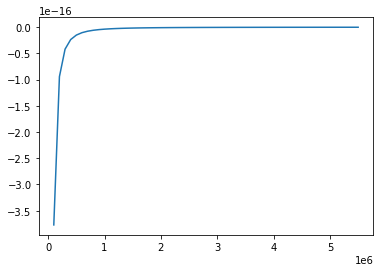

In [46]:
plt.plot(xdata, func(xdata, popt[0],popt[1]))
plt.show()